In [1]:
# import the packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set styling options for seaborn

sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set(rc={'figure.figsize':(15.5,7)})

In [3]:
df = pd.read_csv('datamart.csv')
df.columns


Index(['Year (client)', 'Month (client)', 'Day (client)', 'Client ID', 'DOB',
       'Client Age', 'Age group', 'Gender', 'Disposition ID',
       'Account Holder Type', 'Year (account)', 'Month (account)',
       'Day (account)', 'Account ID', 'Statement frequency', 'Date of opening',
       'Account age (in years)', 'Year (loan)', 'Month (loan)', 'Day (loan)',
       'Loan ID', 'Date of grant(loan)', 'Amount', 'Duration', 'Payments',
       'Status', 'Status Meaning', 'Year (card)', 'Month (card)', 'Day (card)',
       'Card ID', 'Card Type', 'Date issued', 'Card age (in years)',
       'No. of Transactions', 'First Transaction', 'Last Transaction',
       'Total Transaction Amount', 'Final Balance', 'Credit Transactions',
       'Withdrawal Transactions', 'Cash creditted', 'Bank Transfers Credited',
       'Cash Withdrawal', 'Credit Card Withdrawal', 'Bank Transfer Withdrawal',
       'Unknown Transactions', 'Days since last transaction', 'No. of Orders',
       'No. of Recipient Ba

# Client and Bank Account demographics

### Number of clients per year

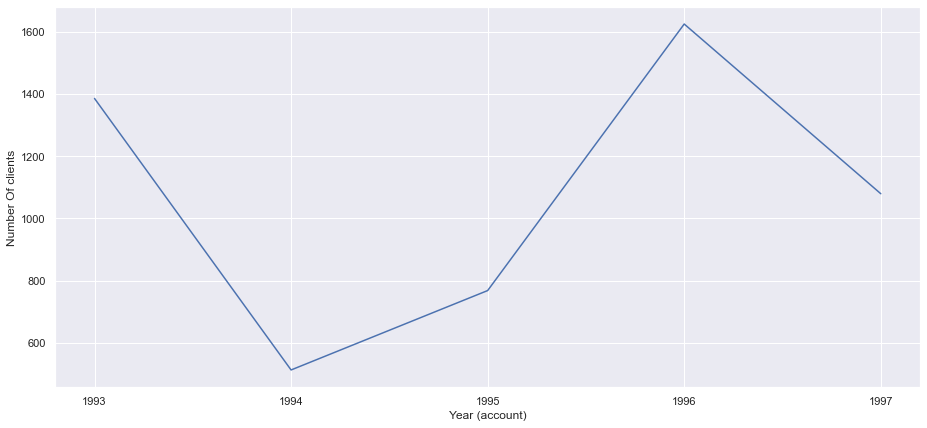

In [4]:
df0 = df.groupby('Year (account)')['Client ID'].agg('count')
df0.plot.line()
plt.ylabel('Number Of clients')
plt.xticks(np.arange(1993, 1998, 1.0))
plt.show()

### Credit card owners by type and gender

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Card Type'),
 Text(0.5, 1.0, 'Counts of different card holders')]

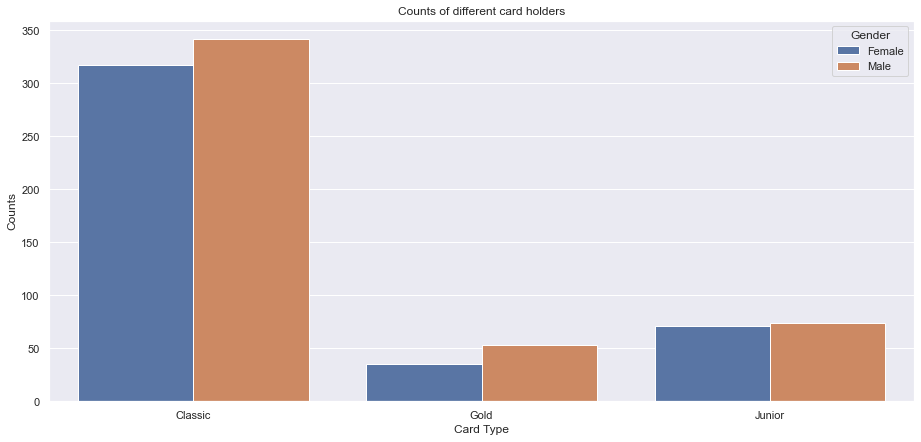

In [5]:
df1 = df.groupby(['Card Type','Gender'],as_index=False).count()


chart1 = sns.barplot(data=df1, x= 'Card Type', y='Client ID', hue='Gender')
chart1.set(xlabel='Card Type', ylabel = 'Counts', title='Counts of different card holders')

### Credit card holders by type and age groups

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Card Type'),
 Text(0.5, 1.0, 'Counts of different card holders')]

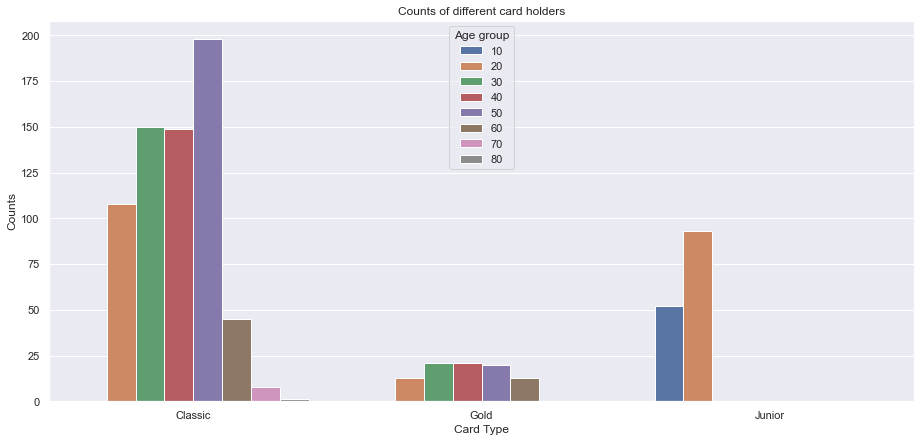

In [6]:
df2 = df.groupby(['Card Type','Age group'],as_index=False).count()

chart2 = sns.barplot(data=df2, x= 'Card Type', y='Client ID', hue='Age group')
chart2.set(xlabel='Card Type', ylabel = 'Counts', title='Counts of different card holders')

### Client distribution by Birth Year

[Text(0, 0.5, 'Number of clients acquired'), Text(0.5, 0, 'Year')]

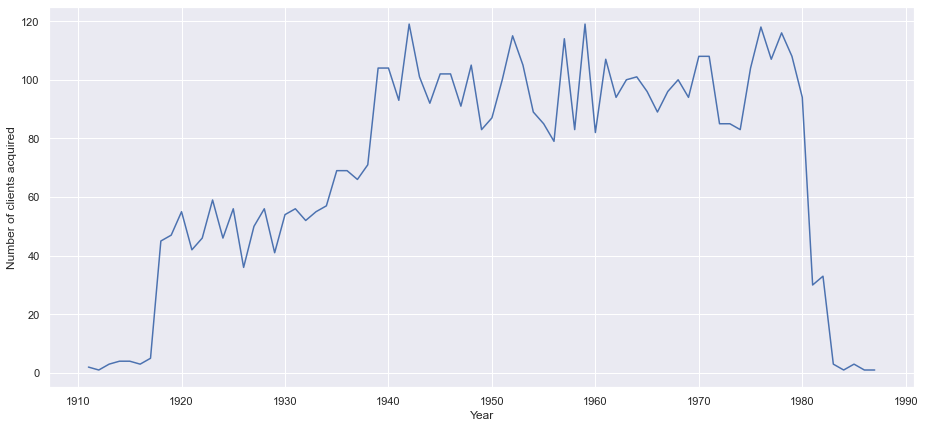

In [7]:
df4 = df.groupby(['Year (client)'],as_index=False).count()
chart4 = sns.lineplot(data=df4, x= 'Year (client)', y='Client ID', ci=None)
chart4.set(xlabel='Year', ylabel = 'Number of clients acquired')

### Client Distribution by Birth Year and gender

[Text(0, 0.5, 'Number of clients acquired'), Text(0.5, 0, 'Year')]

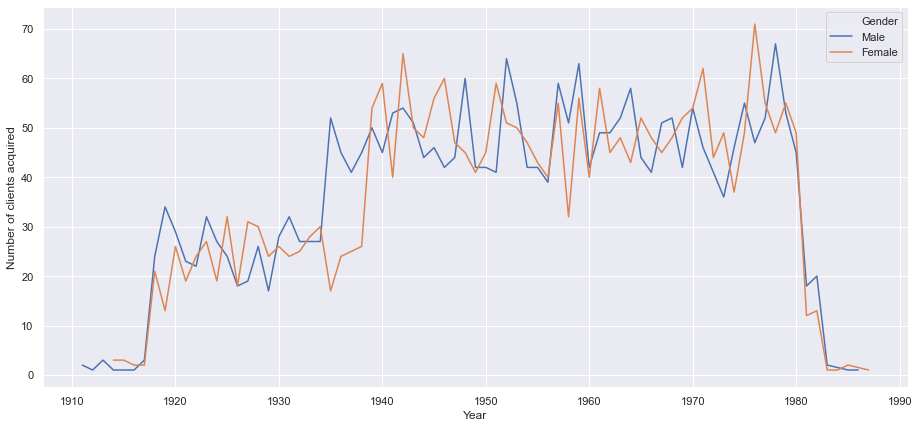

In [8]:
df5 = df.groupby(['Year (client)', 'Gender'],as_index=False).count()
chart5 = sns.lineplot(data=df5, x= 'Year (client)', y='Client ID', 
                     hue='Gender', ci=None)
chart5.set(xlabel='Year', ylabel = 'Number of clients acquired')

### Client Distribution for each Region for Birth Year

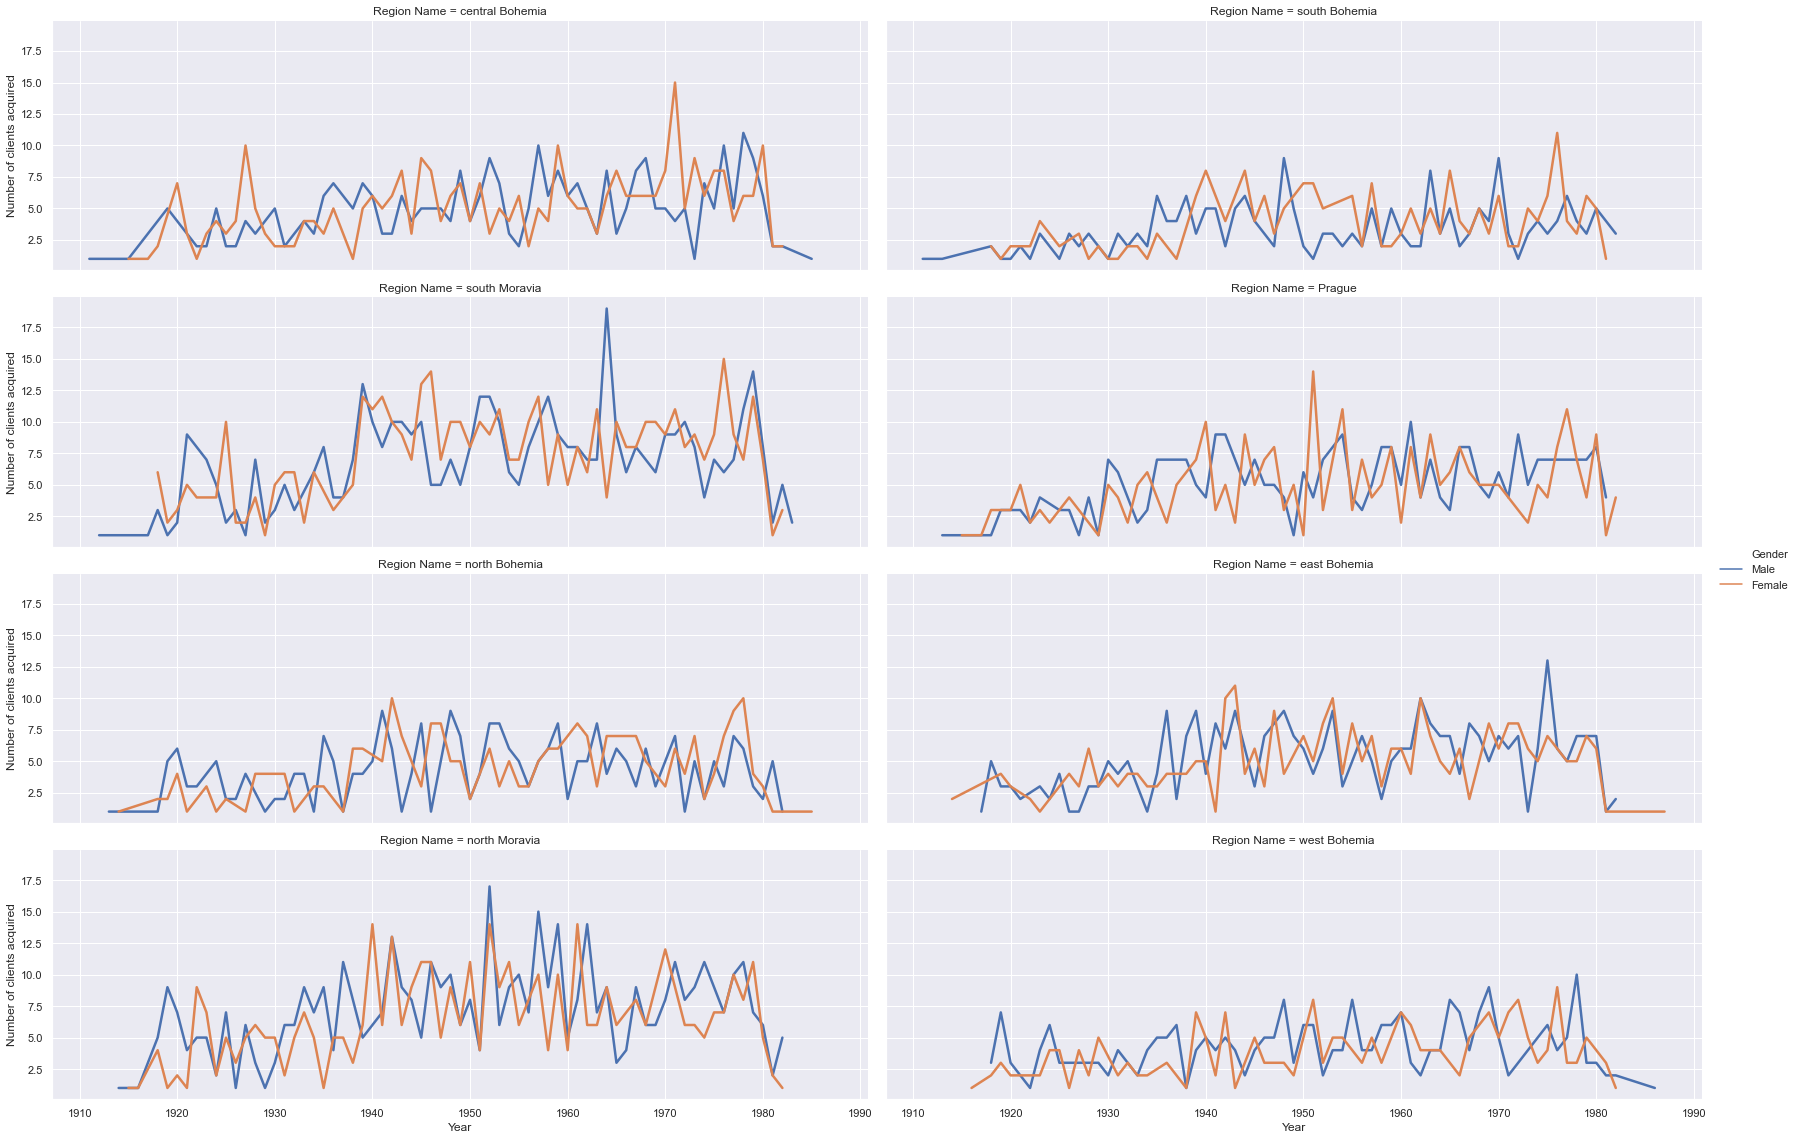

In [9]:
df3 = df.groupby(['Year (client)','Region Name', 'Gender'],as_index=False).count()
chart3 = sns.relplot(data=df3, x= 'Year (client)', y='Client ID', 
                     col='Region Name', hue='Gender',
                     col_wrap=2,height=4, aspect=3, linewidth=2.5,
                     kind="line")
chart3.set(xlabel='Year', ylabel = 'Number of clients acquired')

### Loan Status and Loan Amount

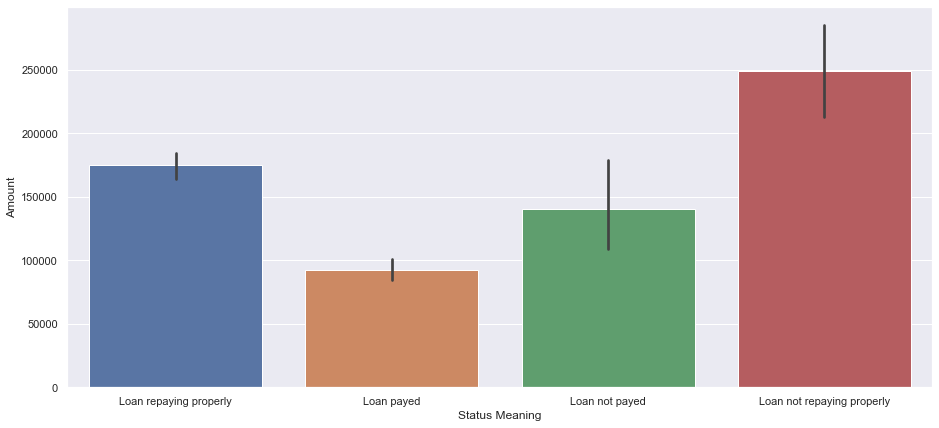

In [10]:
sns.barplot(data=df, x='Status Meaning', y='Amount')

### 39 accounts have a negative balance at the end of 1999. 

In [155]:
len(df[df['Final Balance'] < 0]['Account ID'].unique())

39

### This is the distribution of Final Balance for the accounts. 

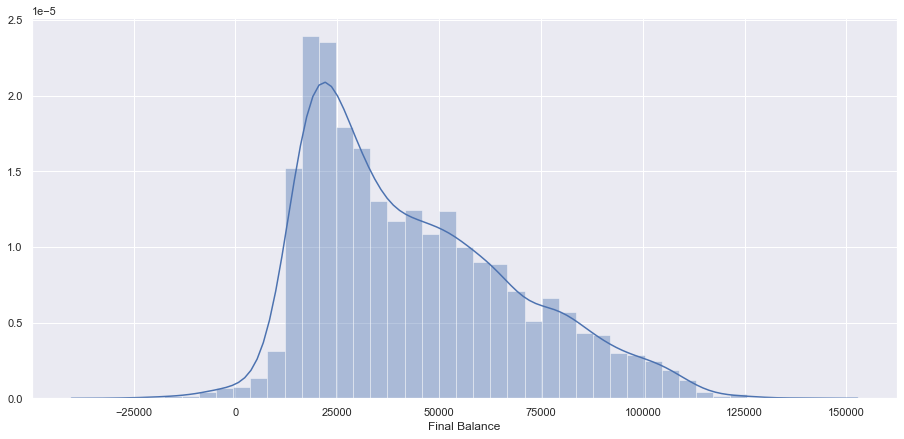

In [11]:
sns.distplot(df['Final Balance'])

### Accounts and Loans

Accounts with loans : 827
Accounts without loans : 4542


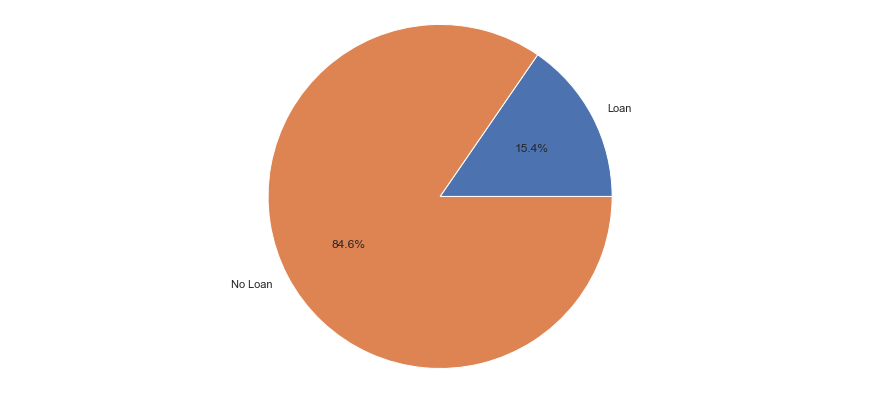

In [12]:
labels = ['Loan','No Loan']
values = [df['Loan ID'].count(),(df['Client ID'].count() - df['Loan ID'].count())]
print('Accounts with loans : ' + str(df['Loan ID'].count()))
print('Accounts without loans : ' + str((df['Client ID'].count() - df['Loan ID'].count())))


# Plot
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Comparing total credit and withdrawal transactions for all accounts 

Credit Transactions : $481874
Withdrawal Transactions : $780751


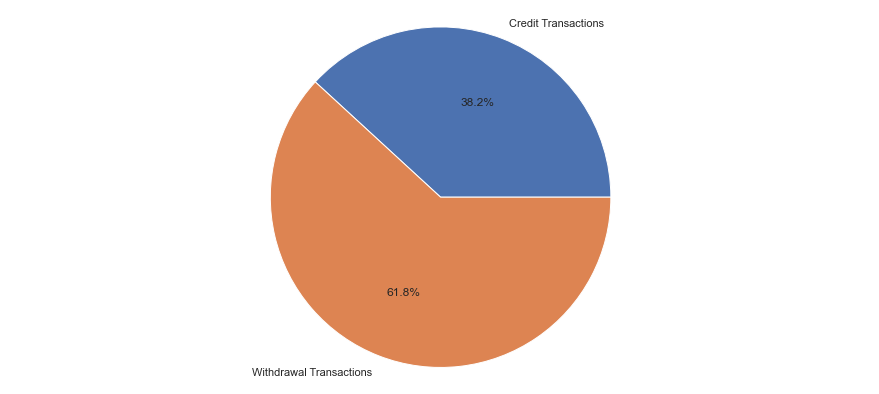

In [13]:
print('Credit Transactions : $' + str(sum(df['Credit Transactions'])))
print('Withdrawal Transactions : $' + str(sum(df['Withdrawal Transactions'])))

labels = ['Credit Transactions', 'Withdrawal Transactions']
sizes = [sum(df['Credit Transactions']), sum(df['Withdrawal Transactions'])]

 
# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

### Comparing different types of Credit transactions

Cash Credit : $2823321753.5
Bank Transfer Credit : $968875509.0


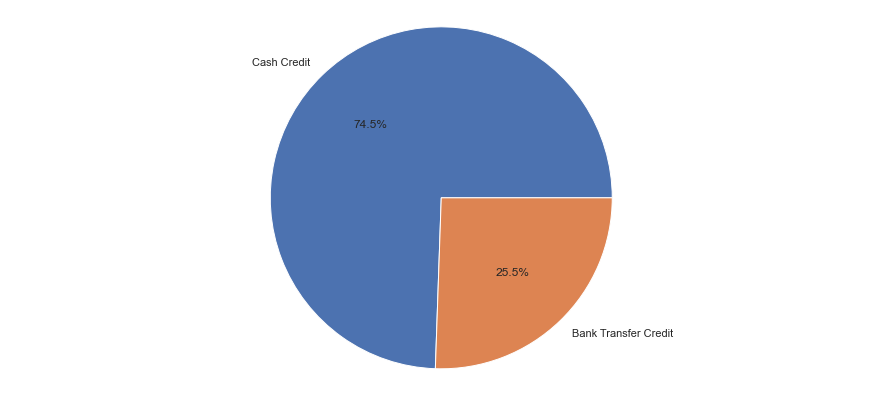

In [14]:
print('Cash Credit : $' + str(sum(df['Cash creditted'])))
print('Bank Transfer Credit : $' + str(sum(df['Bank Transfers Credited'])))

labels = ['Cash Credit', 'Bank Transfer Credit']
sizes = [sum(df['Cash creditted']), sum(df['Bank Transfers Credited'])]

 
# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

### Comparing different types of Withdrawal transactions

Cash Withdrawal : $2751331848.200001
Credit Card Withdrawal : $21231300.0
Bank Transfer Withdrawal : $21231300.0


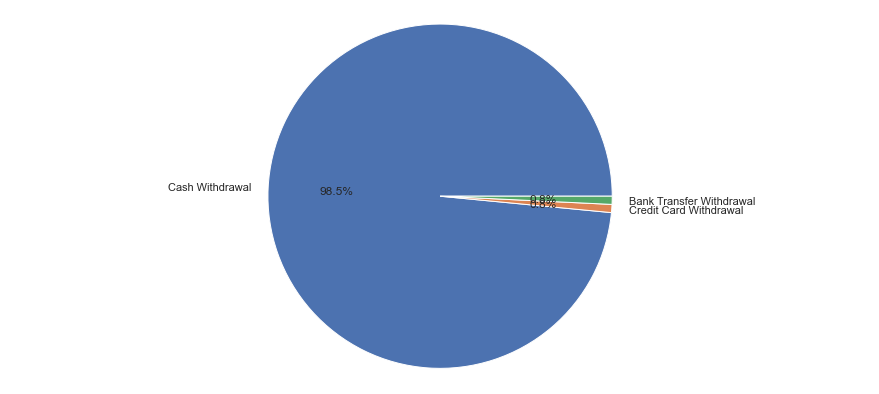

In [15]:
print('Cash Withdrawal : $' + str(sum(df['Cash Withdrawal'])))
print('Credit Card Withdrawal : $' + str(sum(df['Credit Card Withdrawal'])))
print('Bank Transfer Withdrawal : $' + str(sum(df['Bank Transfer Withdrawal'])))


labels = ['Cash Withdrawal', 'Credit Card Withdrawal', 'Bank Transfer Withdrawal']
sizes = [sum(df['Cash Withdrawal']), sum(df['Credit Card Withdrawal']), sum(df['Bank Transfer Withdrawal'])]

 
# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

#### This is the data for Loans

In [17]:
loan_df = df.loc[df['Loan ID'].notnull()]
loan_df

,Year (client),Month (client),Day (client),Client ID,DOB,Client Age,Age group,Gender,Disposition ID,Account Holder Type,...,Municipalities with Population 2000 - 9999,Municipalities with Population > 10000,No. of cities,% Urban population,Average Salary,Entrepreneurs per 1000 inhabitants,Unemployment Rate (1995),Unemployment Rate (1996),Crimes in 1995,Crimes in 1996
27,1973,4,10,2841,1973-04-10,26,20,Female,2841,OWNER,...,2,1,4,65.3,8968,131,2.83,3.35,1740.0,1910
58,1937,12,8,11271,1937-12-08,62,60,Male,10963,OWNER,...,2,1,4,65.3,8968,131,2.83,3.35,1740.0,1910
59,1969,5,25,13490,1969-05-25,30,30,Female,13182,OWNER,...,2,1,4,65.3,8968,131,2.83,3.35,1740.0,1910
60,1945,2,4,2,1945-02-04,54,50,Male,2,OWNER,...,0,1,1,100.0,12541,167,0.29,0.43,85677.0,99107
61,1940,10,9,3,1940-10-09,59,50,Female,3,DISPONENT,...,0,1,1,100.0,12541,167,0.29,0.43,85677.0,99107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,1967,3,17,9872,1967-03-17,32,30,Female,9564,OWNER,...,4,2,6,55.3,8899,149,3.39,3.97,2987.0,2487
5364,1972,6,23,9930,1972-06-23,27,20,Male,9622,OWNER,...,4,2,6,55.3,8899,149,3.39,3.97,2987.0,2487
5366,1938,9,25,11266,1938-09-25,61,60,Male,10958,OWNER,...,4,2,6,55.3,8899,149,3.39,3.97,2987.0,2487
5367,1936,8,26,11267,1936-08-26,63,60,Female,10959,DISPONENT,...,4,2,6,55.3,8899,149,3.39,3.97,2987.0,2487


# Loan Demographics 

### Distribution of Loans by Status

Accounts with loans repayed : 258
Accounts with loans not repayed : 31
Accounts with loans being repayed (properly) : 493
Accounts with loans being repayed (not properly): 45


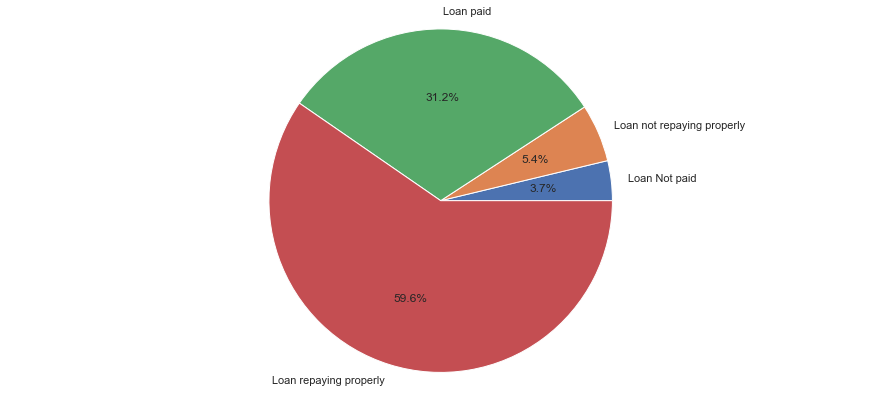

In [21]:
df6 = loan_df.groupby('Status Meaning')['Loan ID'].count()
labels = ['Loan Not paid','Loan not repaying properly', 'Loan paid', 'Loan repaying properly']
values = df6[:]

print('Accounts with loans repayed : ' + str(df6[2]))
print('Accounts with loans not repayed : ' + str(df6[0]))
print('Accounts with loans being repayed (properly) : ' + str(df6[3]))
print('Accounts with loans being repayed (not properly): ' + str(df6[1]))


# Plot
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Total loan amount, region, type of card and disposition, amount of credit or withdrawal transactions, frequency of transactions can help determine clients that will or will not repay loans in the future.

### When Loan amount is high, client tends not repay the loan.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

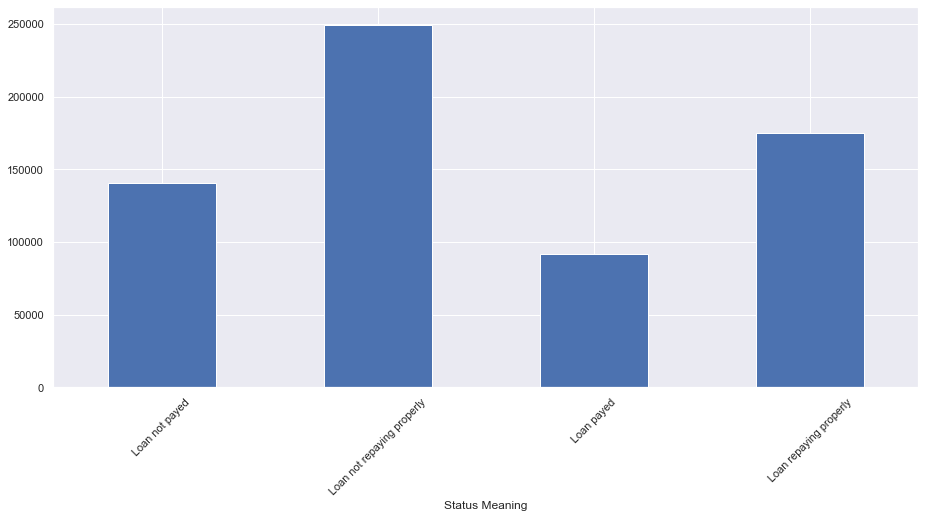

In [23]:
df7 = loan_df.groupby('Status Meaning')['Amount'].mean()
df7.plot.bar()
plt.xticks(rotation = 45)


### Clients of East Bohemia and North Bohemia tend to pay the loan, while clients from North Moravia are more likely to not repay the laon than other regions

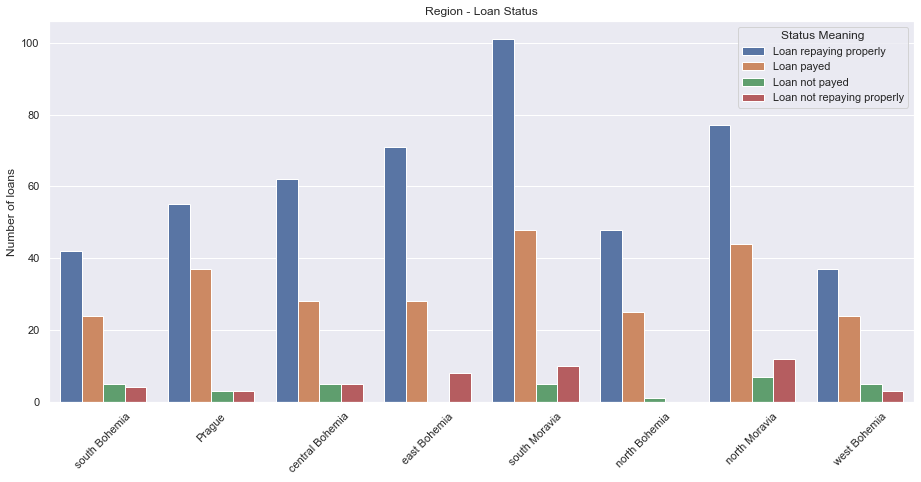

In [24]:
sns.countplot(x="Region Name", hue="Status Meaning", data=loan_df)

plt.legend(title="Status Meaning",loc="upper right")
plt.xlabel('')
plt.ylabel('Number of loans')
plt.title('Region - Loan Status')
plt.xticks(rotation = 45)
plt.show()

### Clients with Gold card have always paid their loans in the past, while the same is not true about clients with Classic or Junior cards

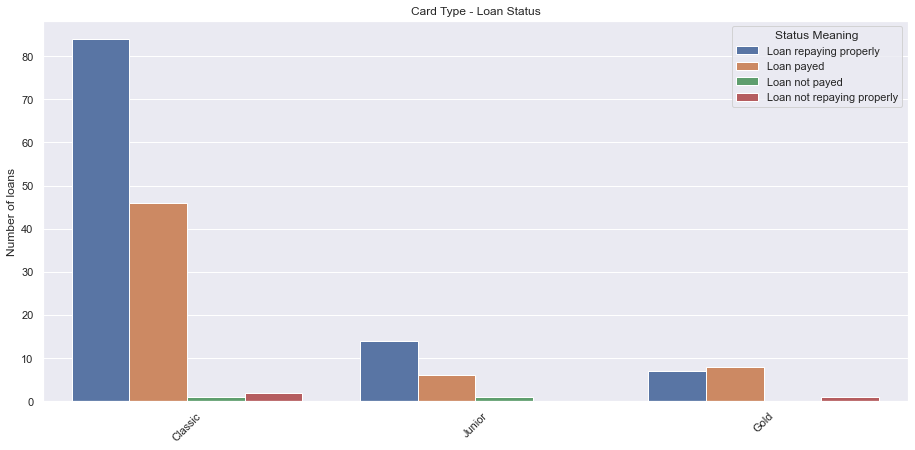

In [25]:
sns.countplot(x="Card Type", hue="Status Meaning", data=loan_df)

plt.legend(title="Status Meaning",loc="upper right")
plt.xlabel('')
plt.ylabel('Number of loans')
plt.title('Card Type - Loan Status')
plt.xticks(rotation = 45)
plt.show()

### While account owners sometimes fail to repay loan, the Disponents (non-owning account clients) have always paid loans on time.

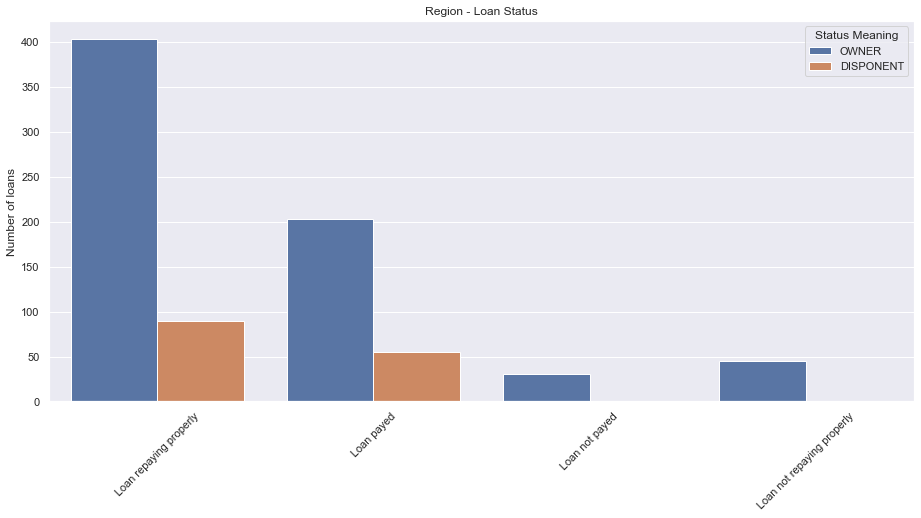

In [30]:
sns.countplot(x="Status Meaning", hue="Account Holder Type", data=loan_df)

plt.legend(title="Status Meaning",loc="upper right")
plt.xlabel('')
plt.ylabel('Number of loans')
plt.title('Region - Loan Status')
plt.xticks(rotation = 45)
plt.show()

### Accounts which do not pay loans on time on an average have higher credit transaction amounts

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

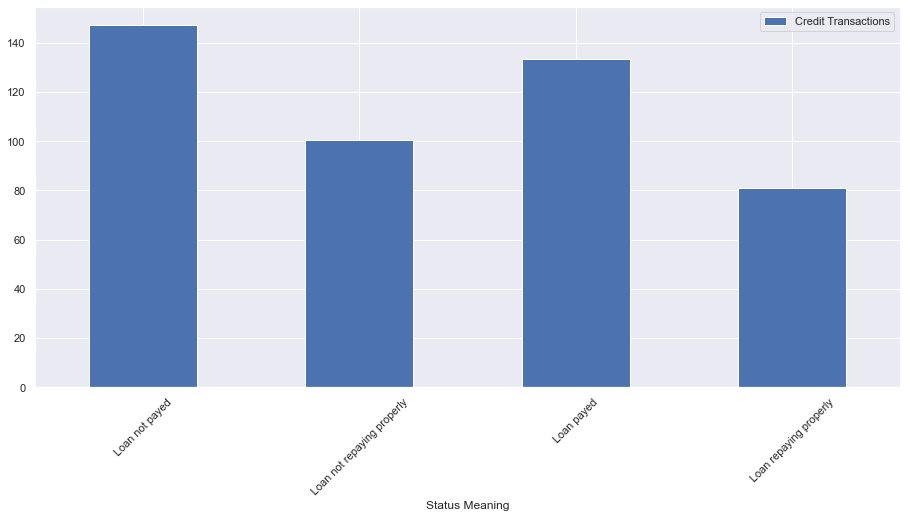

In [32]:
df7 = loan_df.groupby('Status Meaning')[['Credit Transactions']].mean()
df7.plot.bar()
plt.xticks(rotation = 45)

### Accounts which pay loans on time on an average have higher withdrawal transaction amounts

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

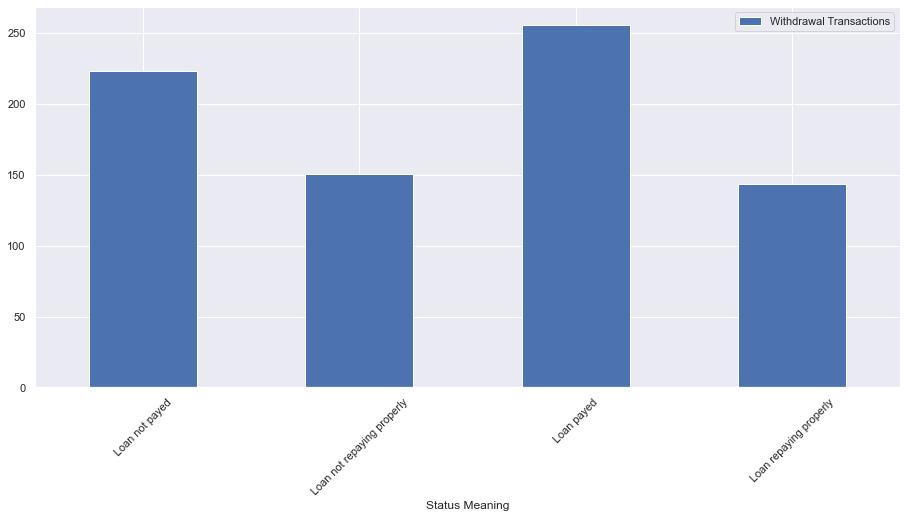

In [34]:
df7 = loan_df.groupby('Status Meaning')[['Withdrawal Transactions']].mean()
df7.plot.bar()
plt.xticks(rotation = 45)

### Accounts which pay loans on time on an average have higher unknown type transaction amounts

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

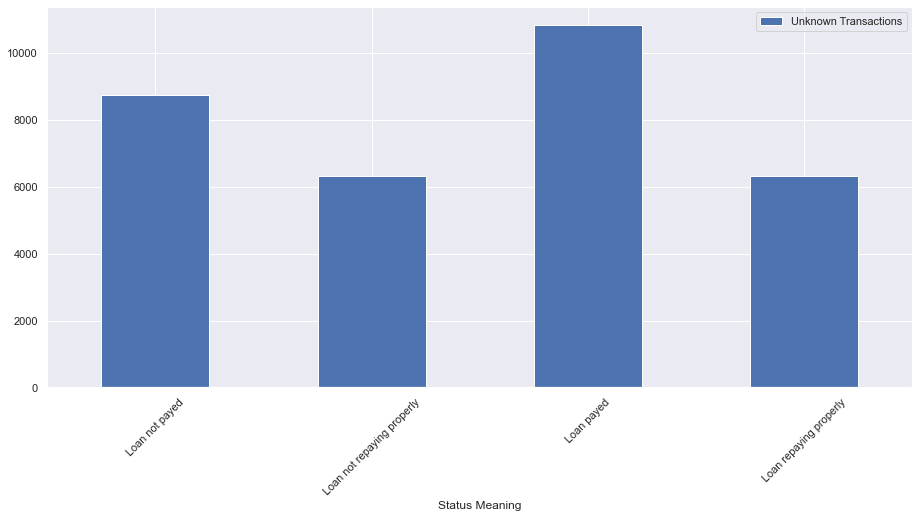

In [36]:
df7 = loan_df.groupby('Status Meaning')[['Unknown Transactions']].mean()
df7.plot.bar()
plt.xticks(rotation = 45)

### Clients which repay their loans also use accounts more frequently

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

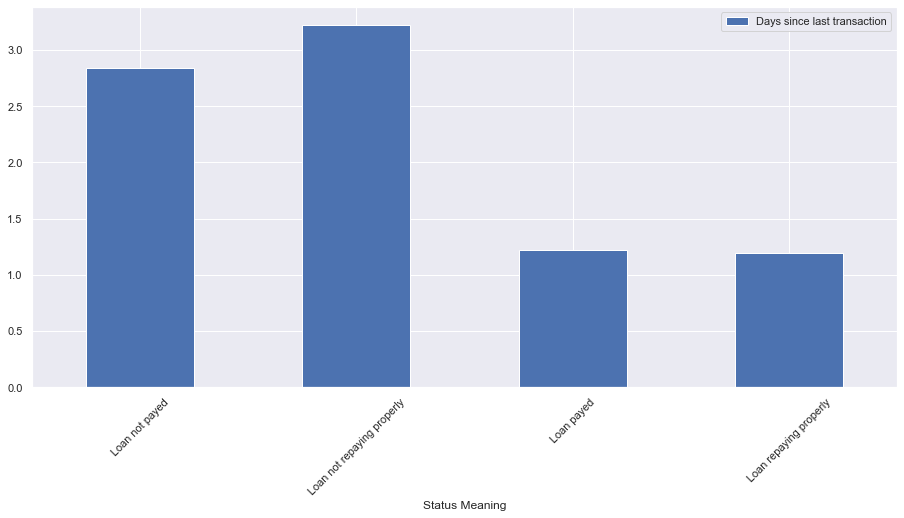

In [38]:
df7 = loan_df.groupby('Status Meaning')[['Days since last transaction']].mean()
df7.plot.bar()
plt.xticks(rotation = 45)

### Age, Age Group, Gender and Total Transaction amounts do not pay a major role in knowing Loan Defaulter patterns

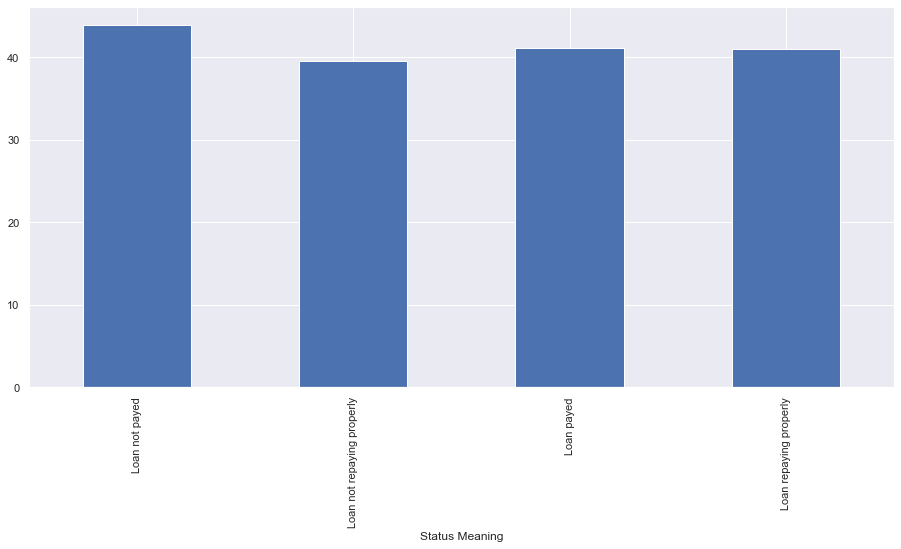

In [39]:
df6 = loan_df.groupby('Status Meaning')['Client Age'].mean()
df6.plot.bar()

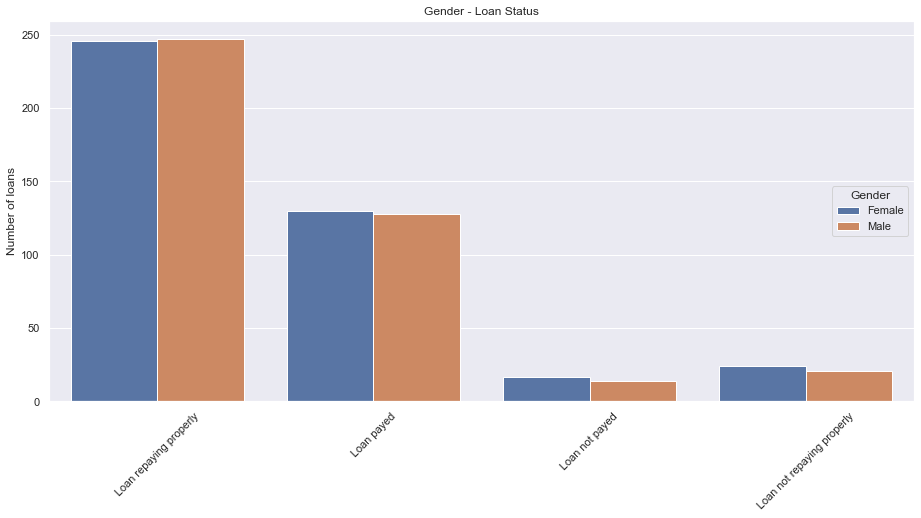

In [40]:

sns.countplot(x="Status Meaning", hue="Gender", data=loan_df)

plt.legend(title="Gender",loc="right")
plt.xlabel('')
plt.ylabel('Number of loans')
plt.title('Gender - Loan Status')
plt.xticks(rotation = 45)
plt.show()

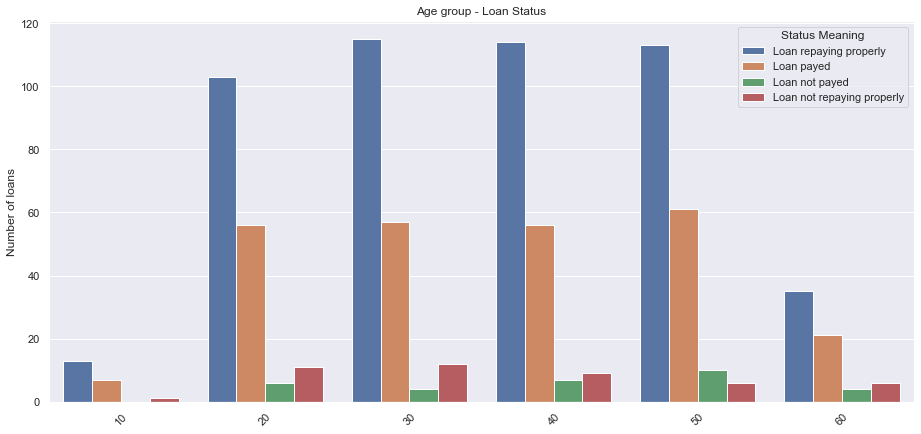

In [41]:
sns.countplot(x="Age group", hue="Status Meaning", data=loan_df)

plt.legend(title="Status Meaning",loc="upper right")
plt.xlabel('')
plt.ylabel('Number of loans')
plt.title('Age group - Loan Status')
plt.xticks(rotation = 45)
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

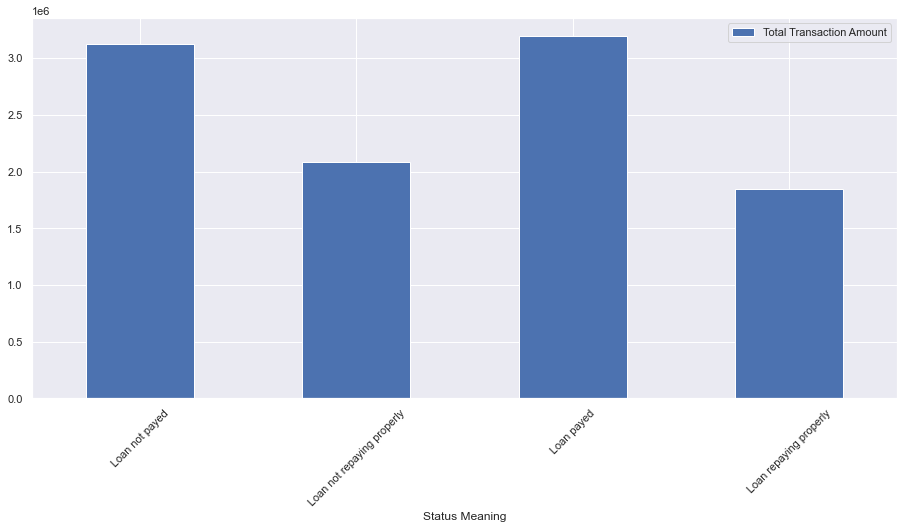

In [42]:
df7 = loan_df.groupby('Status Meaning')[['Total Transaction Amount']].mean()
df7.plot.bar()
plt.xticks(rotation = 45)